# CSE 252A Computer Vision I Fall 2025 - Assignment 2

Instructor: Ben Ochoa

Assigment due: Wed, Nov 5, 11:59 PM

**Name:**

**PID:**

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:

- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu).

- All the solutions must be written in this Jupyter notebook.

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use the packages that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

- You must **submit 3 files: the Notebook, the PDF and the python file** (i.e. the `.ipynb`, the `.pdf` and the `.py` files) on Gradescope. **You must mark each problem on Gradescope in the pdf.**
    - To convert the notebook to PDF, you can choose one way below:

        - You may first export the notebook as HTML, and then print the web page as PDF

            - e.g., in Chrome: File $\rightarrow$ Save and Export Notebook as $\rightarrow$ "HTML"; or in VScode: Open the Command Palette by pressing Ctrl+Shift+P (Windows/Linux) or Cmd+Shift+P (macOS), search for Jupyter: Export to HTML
    
            - Open the saved web page and right click $\rightarrow$ Print... $\rightarrow$ Choose "Destination: Save as PDF" and click "Save")

        - If you have XeTex installed on your machine, you may directly export the notebook as PDF: e.g., in Chrome, File $\rightarrow$ Save and Export Notebook as $\rightarrow$ "PDF"

        - You may use [nbconvert](https://nbconvert.readthedocs.io/en/latest/install.html) to convert the ipynb file to pdf using the following command
        `jupyter nbconvert --allow-chromium-download --to webpdf filename.ipynb`

    - To convert the notebook to python file, you can choose one way below:

        - You may directly export the notebook as py: e.g., in Chrome, File $\rightarrow$ Save and Export Notebook as $\rightarrow$ "Executable script"; or in VScode: Open the Command Palette and search for Jupyter: Export to Python Script

        - You may use [nbconvert](https://nbconvert.readthedocs.io/en/latest/install.html) to convert the ipynb file to python file using the following command
    `jupyter nbconvert --to script filename.ipynb --output output_filename.py`

- Please make sure the content in each cell (e.g. code, output images, printed results, etc.) are clearly visible and are not cut-out or partially cropped in your final PDF file.

- While submitting on gradescope, please make sure to assign the relevant pages in your PDF submission for each problem.

**Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances.

## Problem 1 Image filtering [15 pts]

### Problem 1.1 Implementing Convolution [5 pts]


In this problem, you will implement the convolution filtering operation using NumPy functions, but without using the NumPy convolve function directly.

As shown in the lecture, a convolution can be considered as a sliding window that computes a sum of the pixel values weighted by the rotated kernel. Your version will
- zero-pad an image,
- rotate the kernel $180^\circ$, and
- compute a weighted sum of the neighborhood at each pixel.

#### Problem 1.1.1  [1 pts]
First you will want to implement the `zero_pad` function. Add padding to the given cat image by extending it 50 pixels on the top and bottom and 30 pixels on the left and right.

In [2]:
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt

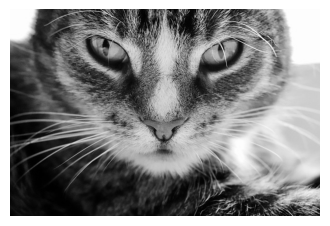

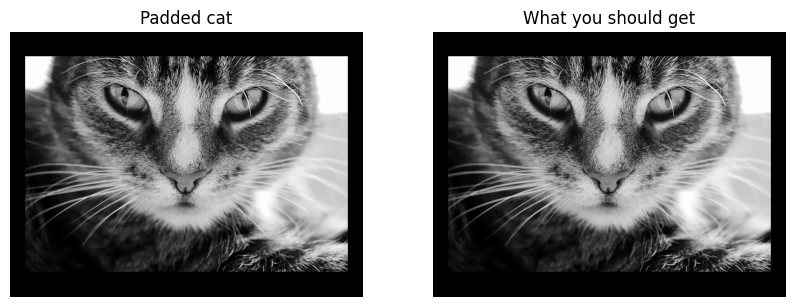

In [3]:
def zero_pad(image, pad_top, pad_down, pad_left, pad_right):
    """
    Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_top = 1, pad_down = 1, pad_left = 2, pad_right = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]

    of shape (3, 5)

    Args:
        image: numpy array of shape (H, W)
        pad_left: width of the zero padding to the left of the first column
        pad_right: width of the zero padding to the right of the last column
        pad_top: height of the zero padding above the first row
        pad_down: height of the zero padding below the last row

    Returns:
        out: numpy array of shape (H + pad_top + pad_down, W + pad_left + pad_right)
    """
    """ ==========
    YOUR CODE HERE
    ========== """

    out = np.pad(image, ((pad_top, pad_down), (pad_left, pad_right)), mode='constant', constant_values=0)
    
    return out

# Open image as grayscale
img = io.imread('cat.jpg', as_gray=True)

# Show image
plt.figure(figsize=(4,4))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

""" ==========
YOUR CODE HERE TO PAD THE IMAGE
========== """
padded_img = zero_pad(img, 50, 50, 30, 30)

# Plot your padded cat
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(padded_img,cmap='gray')
plt.title('Padded cat')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('padded_cat.png', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img,cmap='gray')
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Problem 1.1.2 [2 pts]
Now implement the function **`conv`**, **using at most 2 loops**. This function takes an image $f$ and a kernel $h$ as inputs and output the convolved image $(f*h)$ that has the same shape as the input image (use zero padding before convolution to accomplish this). We will only be using kernels with odd width and odd height. Depending on the computer, your implementation should take around a second or less to run. **Do NOT use existing library functions that directly perform convolution.**


took 0.667510 seconds.


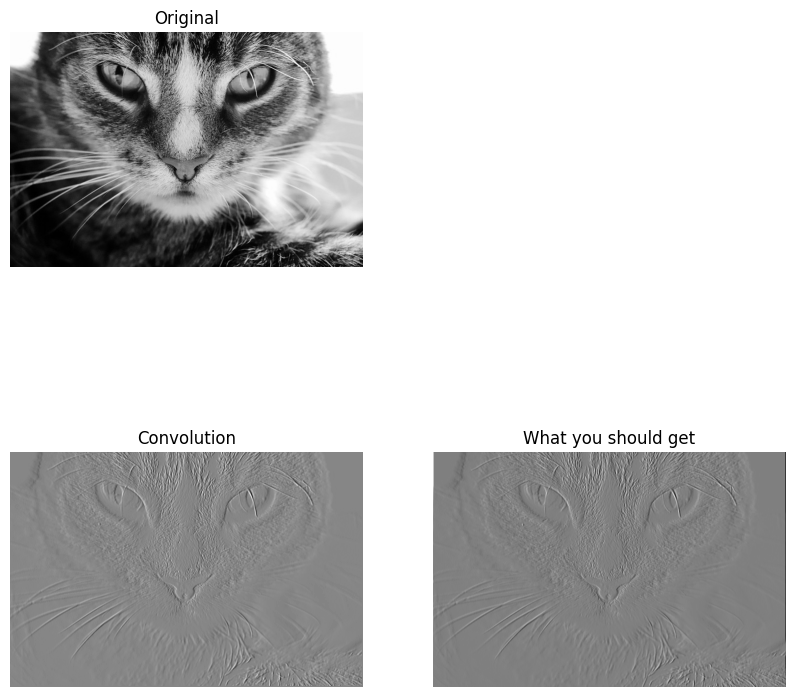

In [6]:
def conv(image, kernel):
    """
    An efficient implementation of a convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute a weighted sum of the neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - Use at most two nested for-loops
        - You may find np.flip() and np.sum() useful
        - You need to handle both odd and even kernel size

    Args:
        image: numpy array of shape (Hi, Wi)
        kernel: numpy array of shape (Hk, Wk)

    Returns:
        out: numpy array of shape (Hi, Wi)
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    """ ==========
    YOUR CODE HERE
    ========== """

    for i in range(Hi - Hk + 1): # limit convlution to valid region 
        for j in range(Wi - Wk + 1):
            out[i, j] = np.sum(image[i:i+Hk, j:j+Wk] * kernel[::-1, ::-1]) # flipped kernel so we can do A(Hi+i, Wi+j)*K(Hi-1-i, Wi-1-j)    

    return out

# Simple convolution kernel.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

t1 = time()
out = conv(img, kernel)
t2 = time()
print("took %f seconds." % (t2 - t1))

# Plot original image
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out,cmap='gray')

plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('convolved_cat.png', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img,cmap='gray')
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Problem 1.1.3 [1 pt]
Now let's filter some images! Here, you will apply the convolution function that you just implemented in order to bring about some interesting image effects. More specifically, we will use convolution to blur and sharpen our images.

First we will apply convolution for image blurring. To accomplish this, convolve the cat image with a 25x25 Gaussian filter for $\sigma = 4$. You can use the included function to obtain the Gaussian kernel.

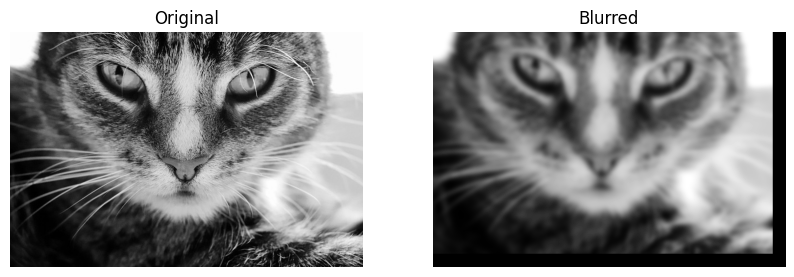

In [9]:
def gaussian2d(sig):
    """
    Creates 2D Gaussian kernel with a sigma of `sig`.
    Arguments:
        sig: Standard deviation of the Gaussian smoothing kernel.
    Returns:
        kernel: 2D Gaussian Kernel
    """
    filter_size = int(sig * 6)
    if filter_size % 2 == 0:
        filter_size += 1

    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def blur_image(img, sigma):
    """
    Blur the image by convolving with a Gaussian filter.
    Arguments:
        img: numpy array of shape (H, W)
        sigma: standard deviation of the Gaussian filter
    Returns:
        blurred_img: numpy array of shape (H, W)
    """
    blurred_img = np.zeros_like(img)
    """ ==========
    YOUR CODE HERE
    ========== """
    gaussian_kernel = gaussian2d(sigma)
    blurred_img = conv(img, gaussian_kernel)
    
    return blurred_img

# Plot original image and blurred image
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')


""" ==========
YOUR CODE HERE TO COMPUTE BLURRED IMAGE
========== """
blurred_cat = blur_image(img, 4)

plt.subplot(2,2,2)
plt.imshow(blurred_cat,cmap='gray')
plt.title('Blurred')
plt.axis('off')

plt.show()

#### Problem 1.1.4 [1 pt]
Next, we will use convolution to sharpen the images. Convolve the image with the following filter to produce a sharpened result. For convenience, we have defined the filter for you:


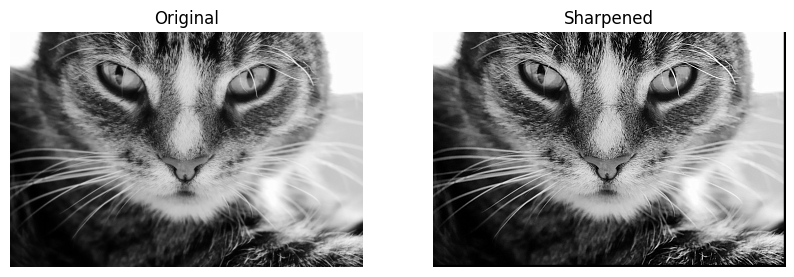

In [10]:
def sharpen_image(img):
    """
    Sharpen the image by convolving with a sharpening filter.
    Arguments:
        img: numpy array of shape (H, W)
    Returns:
        sharpened_img: numpy array of shape (H, W)
    """
    sharpened_img = np.zeros_like(img)
    # This is a 5x5 kernel used for sharpening an image.
    sharpening_kernel = np.array([
        [1, 4,     6,  4, 1],
        [4, 16,   24, 16, 4],
        [6, 24, -476, 24, 6],
        [4, 16,   24, 16, 4],
        [1,  4,    6,  4, 1],
    ]) * -1.0 / 256.0

    """ ==========
    YOUR CODE HERE
    ========== """
    sharpened_img = conv(img, sharpening_kernel)
    
    return sharpened_img

# Plot original image
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img, vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot sharpened image
plt.subplot(2,2,2)
plt.imshow(sharpen_image(img), vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Sharpened')
plt.axis('off')

plt.show()

### Problem 1.2: Nonlinear Filtering  [5 pts]
#### Problem 1.2.1 [3 pts]

Next, we’ll apply a nonlinear filtering method to eliminate a particular type noise in the corrupted MRI image. The non corrupted MRI brain scan appears to have been transmitted over a noisy channel, causing some pixels to abruptly take on extreme values (black or white). You must decide on an appropriate filter (discussed within the scope of the lecture material) to remove this noise and determine an appropriate kernel size (trial and error basis) that removes it effectively. Also ensure the final filtered image is of the same size as the input image by using zero padding.

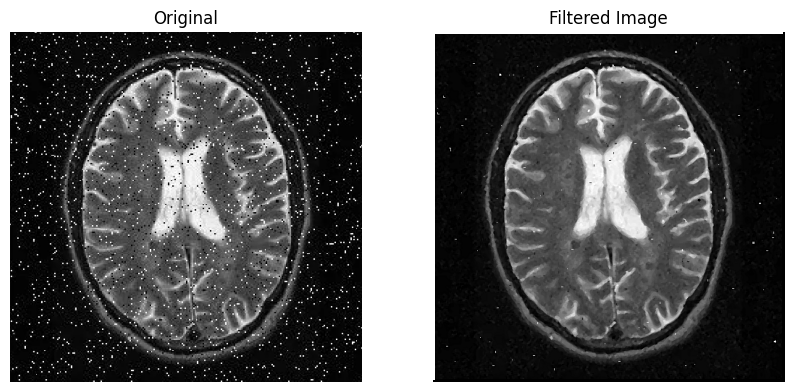

In [33]:
def filter_mri_image(img, filter_size):
    """
    Filter the image by applying a nonlinear filter.
    Arguments:
        img: numpy array of shape (H, W)
        filter_size: size of the filter
    Returns:
        filtered_img: numpy array of shape (H, W)
    """
    filtered_img = np.zeros_like(img)
    """ ==========
    YOUR CODE HERE
    ========== """

    # filter should be like this: median of the surrounding values
    # if extreme values, replace with the average of the surrounding values
    # otherwise, keep the value

    Hi, Wi = img.shape
    for i in range(Hi):
        for j in range(Wi):
            filtered_img[i, j] = np.median(img[i-filter_size//2:i+filter_size//2, j-filter_size//2:j+filter_size//2])


    # then do sharpening
    filtered_img = sharpen_image(filtered_img)
    return filtered_img




img = io.imread('mri_img.png', as_gray=True)
# Plot original image
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img, vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Original')
plt.axis('off')

# Filter and plot the image
""" ==========
YOUR CODE HERE TO COMPUTE FILTERED IMAGE
========== """
filtered_img = filter_mri_image(img, 4)

plt.subplot(2,2,2)
plt.imshow(filtered_img, vmin=0.0, vmax=1.0,cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

#### Problem 1.2.2 [2 pts]

Would there be any artifacts due to zero padding (for same size output image as input) if we operated on the negative image (intensity inversed image) ? What can be done to resolve it ?

Zero padding for this particular one would not be an issue, since the outer border area of the image is 0. However if the inversed image was padded with 0's, then we would likely get a vignette style output. The way to fix this would be to pad with 1's instead of 0's. 

### Problem 1.3: Convolution Theory  [5 pts]
#### Problem 1.3.1 [2 pts]
Consider (1) smoothing an image with a 3x3 averaging filter and then computing the derivative in the y-direction. Also consider (2) computing the derivative first, then smoothing. What is a single **convolution** kernel that will simultaneously implement both (1) and (2)? Try to give a brief justification for how you arrived at the kernel. (Hint: See shape full convolution)

Use the y-derivative filter (**convolution**) for this problem.

$\begin{bmatrix}
\frac{1}{2} \\
0 \\
-\frac{1}{2}
\end{bmatrix}$

3x3 averaging filter:

$$
\frac{1}{9} \begin{bmatrix} 
1 & 1 & 1 \\ 
1 & 1 & 1 \\ 
1 & 1 & 1 
\end{bmatrix}
$$

y-derivative filter:

$$
\begin{bmatrix} 
1/2 \\ 
0 \\ 
-1/2 
\end{bmatrix}
$$

We want conv(image, conv(average * y-derivative)). The kernel is then conv(y-derivative,3x3 avg). This is:

$$
\begin{bmatrix} 
1/18 & 1/18 & 1/18 \\ 
1/18 & 1/18 & 1/18 \\ 
0 & 0 & 0 \\ 
-1/18 & -1/18 & -1/18 \\ 
-1/18 & -1/18 & -1/18 
\end{bmatrix}
$$


#### Problem 1.3.2 [3 pts]
Certain 2D filters can be expressed as a convolution of two 1D filters. Such filters are called separable filters. Give an example of a 3 $\times$ 3 separable filter and compare the number of arithmetic operations it takes to
convolve an n $\times$ n image using that filter before and after separation. Count both, the number of multiplication and addition operations in each case.

Assume that the convolution of the image and filter is performed in "same" mode, i.e., the input image is padded so that the output image has same dimensions as original input image.

Box filters are separable: 

$$
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

It would look like the following two 1D filters being applied:

$$
\text{row filter: } [1, 1, 1], \quad
\text{column filter: } 
\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
$$

For the 2D matrix convolution, we need to do \(3 \times 3 = 9\) multiplications and \(3 \times 3 - 1 = 8\) additions per element. For an \(n \times n\) image, this gives:

$$
9 n^2 + 8 n^2 = 17 n^2 \text{ operations}
$$

For the two 1-D filters, we need to do 3 multiplications and 2 additions per pixel for each filter. Since there are 2 filters, this gives:

$$
2 \cdot (3 n^2 + 2 n^2) = 10 n^2 \text{ operations}
$$


### Problem 1.4 Template Matching [5 pts]
Suppose your company has several products of printed circuit boards (PCBs), and a specific component needs to be updated to its latest version. Right now, finding the location of this component on each PCB is a slow and manual task. To speed this up and avoid human error, you want to build a computer vision solution that can automatically locate that component using template matching.

Luckily, you have learned in CSE 252A (or are learning right now) that convolution can be used for template matching: a rotated template $g$ is multiplied with regions of a larger image $f$ to measure how similar each region is to the template. Note that you will want to rotate the filter $180^\circ$ before giving it to your convolution function, so that it is overall not rotated when making comparisons. You will also want to subtract off the mean value of the image or template (whichever you choose, subtract the same value from both the image and template) so that our solution is not biased toward higher-intensity (white) regions.

The template of the component (template.png) and the image of one of the PCB (circuit_board.png) is provided. We will use convolution to find the component in the given PCB.

<img src="template.png" alt="template" width="25px"/>
<img src="circuit_board.png" alt="shelf" width="600px"/>



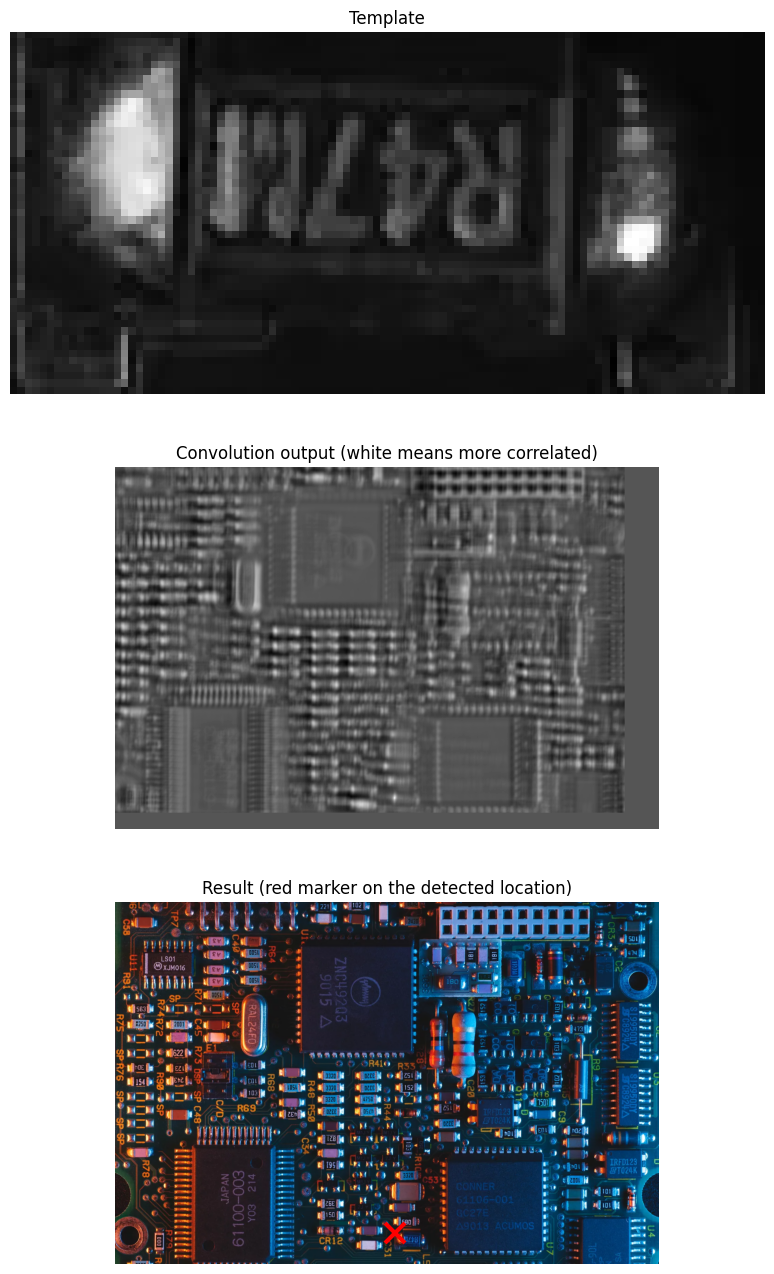

In [36]:
# Load template and image in grayscale
img = io.imread('circuit_board.png')
img_gray = io.imread('circuit_board.png', as_gray=True)
temp = io.imread('template.png')
temp_gray = io.imread('template.png', as_gray=True)

# Perform a convolution between the image (grayscale) and the template (grayscale) and store
# the result in the out variable
""" ==========
YOUR CODE HERE
========== """
# rotate template by 180 degrees
temp_gray_rotated = np.rot90(temp_gray, 2)

# subtract mean of template and image
temp_gray_rotated = temp_gray_rotated - np.mean(temp_gray_rotated)
img_gray = img_gray - np.mean(img_gray)

out = conv(img_gray, temp_gray_rotated)

# out max location is where the filter detects the most
y, x = np.unravel_index(np.argmax(out), out.shape)


# Display component template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp_gray, cmap="gray")
plt.title('Template')
plt.axis('off')

# Display convolution output
plt.subplot(3, 1, 2)
plt.imshow(out, cmap="gray")
plt.title('Convolution output (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img, cmap="gray")
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'rx', ms=15, mew=3) 
plt.show()

## Problem 2: Edge detection [21 pts]

In this problem, you will write a function to perform Canny edge detection. You will use the image `ucsd_building.jpg`. The following steps need to be implemented.



### Problem 2.1 Smoothing [1 pt]
First, we need to smooth the images in order to prevent noise from being considered as edges. For this problem, use Gaussian kernel filter with $\sigma = 1$ to smooth the images. 
Use the <code>gaussian2d()</code> from Problem 1.1.3 to obtain the Gaussian kernel.

In [7]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = [5, 5]

In [8]:
def smooth(image, sig):
    """
    Smoothing the image to prevent the noise from being considered as edges.
    Arguments:
        image: numpy array of shape (H, W)
        sig: Standard deviation of the Gaussian smoothing kernel.
    Returns:
        smoothed_image: numpy array of shape (H, W)
    """

    """ ==========
    YOUR CODE HERE
    ========== """
    

In [ ]:
# Load image in grayscale
image = io.imread('ucsd_building.jpg', as_gray=True)
assert len(image.shape) == 2, 'image must be grayscale; check your Python/skimage versions'
smoothed = smooth(image, 1)
print('Original:')
plt.imshow(image, cmap=cm.gray)
plt.show()

print('Smoothed:')
plt.imshow(smoothed, cmap=cm.gray)
plt.show()

### Problem 2.2 Gradient Computation [5 pts]
After you have finished smoothing, find the image gradient in the horizontal and vertical directions. Compute the gradient magnitude image as $|G| = \sqrt{G_x^2 + G_y^2}$. The edge direction for each pixel is given by $G_\theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)$.

You must not have any divide by zero errors. Consider using `np.arctan2()`. Use the `conv()` function you defined earlier. **You must use the 3-point central difference kernel**.

Show the gradient magnitude and gradient direction.

In [10]:
def gradient(image):
    """
    Compute the gradient of the image using the 3-point central difference kernels.
    Arguments:
        image: numpy array of shape (H, W)
    Returns:
        g_mag: numpy array of shape (H, W), containing the magnitude of the gradient
        g_theta: numpy array of shape (H, W), containing the direction of the gradient
    """

    """ ==========
    YOUR CODE HERE
    ========== """
    
    return g_mag, g_theta

In [ ]:
g_mag, g_theta = gradient(smoothed)
print('Gradient magnitude:')
plt.imshow(g_mag, cmap=cm.gray)
plt.show()

print('Gradient direction:')
plt.imshow(g_theta, cmap='gray')
plt.show()

### Problem 2.3 Non-Maximum Suppression [7 pts]
We would like our edges to be sharp, unlike the ones in the gradient image. Use non-maximum suppression to preserve all local maxima and discard the rest. You can use the following method to do so:

  - For each pixel in the gradient magnitude image:
    - Round the gradient direction $\theta$ to the nearest multiple of $45^{\circ}$ (which we will refer to as $ve$).
    - Compare the edge strength at the current pixel to the pixels along the $ve$ and the opposite direction of $ve$ in the 8-connected neighborhood.
    - If the pixel does not have a larger value than both of its two neighbors in the $ve$ and the opposite direction of $ve$, suppress the pixel's value (set it to 0). By following this process, we preserve the values of only those pixels which have maximum gradient magnitudes in the neighborhood along the $ve$ and the opposite direction of $ve$.
  - Return the result as the NMS response.

In [12]:
def nms(g_mag, g_theta):
    """
    Non-maximum Suppression - to sharpen our edges

    Arguments:
        g_mag: numpy array of shape (H, W), containing the magnitude of the gradient
        g_theta: numpy array of shape (H, W), containing the direction of the gradient
    Returns:
        nms_response: numpy array of shape (H, W)
    """

    """ ==========
    YOUR CODE HERE
    ========== """

    
    return nms_response

In [ ]:
nms_image = nms(g_mag, g_theta)
print('NMS:')
plt.imshow(nms_image, cmap=cm.gray)
plt.show()

### Problem 2.4 Hysteresis Thresholding [8 pts]
Choose suitable values of thresholds and use the thresholding approach decribed in lecture 6. This will remove the edges caused by noise and color variations.

  - Define two thresholds `t_min` and `t_max`.
  - If the `nms > t_max`, then we select that pixel as an edge.
  - If `nms < t_min`, we reject that pixel.
  - If `t_min < nms < t_max`, we select the pixel only if there is a path from/to another pixel with `nms > t_max`. (Hint: Think of all pixels with `nms > t_max` as starting points and run BFS/DFS from these starting points).
  - The choice of value of low and high thresholds depends on the range of values in the gradient magnitude image. You can start by setting the high threshold to some percentage of the max value in the gradient magnitude image, e.g. thres_high = 0.2 * image.max(), and the low threshold to some percentage of the high threshold, e.g. thres_low = 0.5 * thres_high. And then you can tune those values however you want.

In [ ]:
def hysteresis_threshold(image):
    """
    Hysteris Thresholding to remove edges caused by noise and color variations.

    Arguments:
        image: numpy array of shape (H, W)
    Returns:
        result: numpy array of shape (H, W)
    """

    """ ==========
    YOUR CODE HERE
    ========== """
    # Perform thresholding
    
    return result

In [ ]:
thresholded = hysteresis_threshold(nms_image)
print('Thresholded:')
plt.imshow(thresholded, cmap=cm.gray)
plt.show()

## Problem 3 Corner detection [20 pts]

### Problem 3.1 [19 pts]
In this problem, we are going to build a corner detector. This must be done according to the lecture slides. You must fill in the function <code>corner_detect</code> below, which takes as input <code>image</code>, <code>nCorners</code>, <code>smoothSTD</code>, <code>windowSize</code> -- where `smoothSTD` is the standard deviation of the smoothing kernel and `windowSize` is the window size for corner detector and non-maximum suppression. In the lecture, the corner detector was implemented using a hard threshold. Do not do that; instead, return the `nCorners` strongest corners after non-maximum suppression. This way you can control exactly how many corners are returned.

We will be using three different images for this question: dino, matrix, warrior. There are two images of each in their respective folders.

In this problem, try the following different standard deviation $\sigma$ parameters for the Gausian smoothing kernel: 0.8, 1.5, 2.5, 3.5 and 4.5. For a particular $\sigma$, you must take the kernel size to be $6\sigma$. Add $1$ if the kernel size is even. So, for example, if $\sigma=2$, corner detection kernel size is $13$. This must be followed throughout all of the experiments in this assignment.

Run your code on all images (with `nCorners` = 20) and display outputs as shown below. There will be a total of 30 images as outputs: 5 choices of `smoothSTD` x (2 `dino` + 2 `matrix` + 2 `warrior` images).

Note: You may find `scipy.ndimage.gaussian_filter` helpful for smoothing. You may use the library function `scipy.signal.convolve()` for convolution purposes in this question. These functions are highly optimized and can speed up your code. **Do not use library functions that directly compute the eigenvalues. You must implement the equation for the minor eigenvalue of a 2x2 matrix provided in lecture.**

<!--- ![dinoCorner1](dinoCorner1.png) --->
<!--- The previous results in export to pdf errors on some systems but the following does not --->
<img src="dinoCorner1.png">
<!--- ![dinoCorner2](dinoCorner2.png) --->
<!--- The previous results in export to pdf errors on some systems but the following does not --->
<img src="dinoCorner2.png">

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import imageio.v2 as imageio
from scipy.signal import convolve

In [18]:
def rgb2gray(rgb):
    """
    Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.21263903, 0.71516871, 0.072192319])

In [19]:
def corner_detect(image, nCorners, smoothSTD, windowSize):
    """
    Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for corner detector and non-maximum suppression.

    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2).

    """

    """ ==========
    YOUR CODE HERE
    ========== """
    

In [ ]:
def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=35, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=35, edgecolors='r', facecolors='none')
    plt.show()

for smoothSTD in (0.8, 1.5, 2.5, 3.5, 4.5):
    windowSize = int(smoothSTD * 6)
    if windowSize % 2 == 0:
        windowSize += 1

    print('smooth stdev: %r' % smoothSTD)
    print('window size: %r' % windowSize)

    nCorners = 20

    # read images and detect corners on images

    imgs_din = []
    crns_din = []
    imgs_mat = []
    crns_mat = []
    imgs_war = []
    crns_war = []

    for i in range(2):
        img_din = imageio.imread('dino/dino' + str(i) + '.png')
        imgs_din.append(rgb2gray(img_din))
        # downsize your image in case corner_detect runs slow in test
        # imgs_din.append(rgb2gray(img_din)[::2, ::2])
        crns_din.append(corner_detect(imgs_din[i], nCorners, smoothSTD, windowSize))

        img_mat = imageio.imread('matrix/matrix' + str(i) + '.png')
        imgs_mat.append(rgb2gray(img_mat))
        # downsize your image in case corner_detect runs slow in test
        # imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
        crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))

        img_war = imageio.imread('warrior/warrior' + str(i) + '.png')
        imgs_war.append(rgb2gray(img_war))
        # downsize your image in case corner_detect runs slow in test
        # imgs_war.append(rgb2gray(img_war)[::2, ::2])
        crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))

    show_corners_result(imgs_din, crns_din)
    show_corners_result(imgs_mat, crns_mat)
    show_corners_result(imgs_war, crns_war)

### Problem 3.2 [1 pts]
Comment on your results and observations. You don't need to comment per output; just discuss any trends you see for the detected corners as you change the windowSize and increase the smoothing with respect to the three pairs of images (warrior, dino and matrix). Also discuss whether you are able to find corresponding corners for the pairs of images.


## Problem 4 Epipolar rectification and feature matching [60 pts]

### 4.1 Theory: Computing the Essential Matrix [6 pts]

Consider a stereo rig, formed of two cameras. The rotation and translation of each camera is given to you. Compute the essential matrix $\mathtt{E}$ from the given information.

Note: You may use Numpy library to compute the essential matrix. Show the code for computation and the result.

Camera 1:

$$ R_1 =
\begin{bmatrix}
1 & 0 & 0 \\
0 & -\frac{\sqrt{3}}{2} & - \frac{1}{3} \\
0 & \frac{1}{3} & -\frac{\sqrt{3}}{2} \\
\end{bmatrix}
$$

$$ t_1 =
\begin{bmatrix}
4 \\ 3 \\ 1
\end{bmatrix}
$$

Camera 2:
$$ R_2 =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \frac{1}{\sqrt{2}} & - \frac{1}{2} \\
0 & \frac{1}{2} & \frac{{1}}{\sqrt{2}} \\
\end{bmatrix}
$$

$$ t_2 =
\begin{bmatrix}
-4 \\ 3 \\ 1
\end{bmatrix}
$$

In [ ]:
""" ==========
YOUR CODE HERE TO COMPUTE AND PRINT THE ESSENTIAL MATRIX
========== """

### 4.2 Epipolar rectification [22 pts]

In this problem, we are going to perform epipolar rectification. Given calibrated stereo cameras (i.e., calibration matrices $K_1$ and $K_2$, camera rotation matrices $R_1$ and $R_2$, camera translation vectors $t_1$ and $t_2$), you are expected to determine the rotation matrix $R$ and calibration matrix $K$ of the virtual cameras.
Your goal is to complete the function <code>epipolarRecification</code>, which determines the calibration matrix and rotation matrix of both cameras, the translation vector of each of the cameras, and matching planar transformations that epipolar rectify the two images acquired by the cameras. The virtual cameras have the same centers as the source real cameras.


#### 4.2.1 Camera translation matrices and Projective Transformation matrices [6 pts]
To calculate the camera translation from cameras with the same camera center, you will have to complete the <code>cameraTranslation</code> first.
Another function you need to complete is <code>calcProjectiveTransformation</code>, which calculates the planar projective transformation from cameras with the same camera center.
The camera calibration matrix (same for both cameras) will be calculated by <code>calcVirtualK</code>. This is provided for you.
To get the rotation matrix $R$ of the virtual camera, we usually interpolate halfway between the two 3D rotations embodied by $R_1$ and $R_2$. For simplicity, this will be also given to you.

In [22]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
from math import floor, ceil

In [23]:
def cameraTranslation(R_real, t_real, R_virt):
    '''
    Calculate the camera translation of virtual camera from real camera with the same camera center.

    Args:
    R_real: The rotation matrix of the real camera.
    t_real: The translation vector of the real camera.
    R_virt: The rotation matrix of the virtual camera.

    Returns:
    The translation vector of the virtual camera.
    '''
    """ ==========
    YOUR CODE HERE
    ========== """


In [24]:
def calcProjectiveTransformation(K_real, R_real, K_virt, R_virt):
    '''
    Calculates the planar projective transformation from cameras with the same camera center.
    This function determines the planar projective transformation from the image of a 3D point in the real camera to its image in the virtual camera
    where P_real = K_real * R_real * [I | -C] and P_virt = K_virt * R_virt * [I | -C].

    Args:
    K_real: The calibration matrix of the real camera.
    R_real: The rotation matrix of the real camera.
    K_virt: The calibration matrix of the virtual camera.
    R_virt: The rotation matrix of the virtual camera.

    Returns:
    The transformation matrix.
    '''
    """ ==========
    YOUR CODE HERE
    ========== """


In [ ]:
def calcVirtualK(K1_real, K2_real):
    '''
    Camera calibration matrix (same for both cameras)
    '''
    alpha = (K1_real[0][0] + K2_real[0][0] + K1_real[1][1] + K2_real[1][1]) // 4
    x0 = (K1_real[0][2] + K2_real[0][2]) // 2
    y0 = (K1_real[1][2] + K2_real[1][2]) // 2
    K_virt = np.zeros((3, 3))
    K_virt[0][0] = alpha
    K_virt[0][2] = x0
    K_virt[1][1] = alpha
    K_virt[1][2] = y0
    K_virt[2][2] = 1
    return K_virt

In [ ]:
import scipy.linalg
import math

def calcVirtualR(R1_real, R2_real, t1_real, t2_real):
    '''
    interpolate between two rotation matrices
    '''

    # Rotation matrix that is half way between R1_real and R2_real
    Rinterp = scipy.linalg.expm(0.5*scipy.linalg.logm(R2_real@R1_real.T))@R1_real

    # Rotation matrix to compose with above rotation matrix such that relative camera translation vector is aligned with the X-axis
    u = cameraTranslation( R2_real, t2_real, Rinterp ) - cameraTranslation( R1_real, t1_real, Rinterp)
    vhat = np.array([[1],[0],[0]])

    if 0 > u.T@vhat:
        #Unit vector along negative X-axis instead, so that the images are not upside down
        vhat[0] = -1

    # The 3-vector 'axis' defines an axis and theta is the rotation about the axis.
    theta =  math.acos((u.T@vhat)[0,0]/np.linalg.norm(u))
    axis = np.cross(u.reshape(-1),vhat.reshape(-1))

    # The angle-axis representation is a 3-vector omega where the norm of omega is theta and the unitized omega is the unit vector representing the axis of rotation.
    omega = (theta/np.linalg.norm(axis))*axis
    omega = omega.reshape(-1)

    # omega_x is the skew symmetric matrix form of omega
    omega_x  = np.array([[0, -omega[2], omega[1]],
                         [omega[2], 0, -omega[0]],
                         [-omega[1], omega[0], 0]])


    R_x = scipy.linalg.expm(omega_x)
    R_virt = R_x@Rinterp

    return R_virt

In [ ]:
def epipolarRecification(K1_real, R1_real, t1_real,
                         K2_real, R2_real, t2_real):
    '''
    Given two calibrated cameras, this function determines the calibration matrix and rotation matrix of both cameras, the translation vector of each of the cameras, and matching planar transformations that epipolar rectify the two image acquired by the cameras.
    The virtual cameras have the same centers as the source cameras.

    Args:
    K1_real: The calibration matrix of the first source camera.
    R1_real: The rotation matrix of the first source camera.
    t1_real: The translation vector of the first source camera.
    K2_real: The calibration matrix of the second source camera.
    R2_real: The rotation matrix of the second source camera.
    t2_real: The translation vector of the second source camera.

    Returns:
    K_virt: The calibration matrix of the virtual cameras.
    t1_virt: The translation vector of the first virtual camera.
    t2_virt: The translation vector of the second virtual camera.
    H1, H2: The image rectification transformation matrices.
    '''
    R_virt = calcVirtualR(R1_real, R2_real, t1_real, t2_real)

    t1_virt = cameraTranslation(R1_real, t1_real, R_virt)
    t2_virt = cameraTranslation(R2_real, t2_real, R_virt)

    K_virt = calcVirtualK(K1_real, K2_real)

    H1 = calcProjectiveTransformation(K1_real, R1_real, K_virt, R_virt)
    H2 = calcProjectiveTransformation(K2_real, R2_real, K_virt, R_virt)

    return K_virt, t1_virt, t2_virt, H1, H2

#### Problem 4.2.2 Warp Image [10 pts]
After calling <code>epipolarRectification</code>, we can get the projective transformation matrices $H1$ and $H2$. Next, we will geometrically transform (i.e., "warp") the image so that the epipolar lines are image rows. You must complete <code>warpImage</code> using the **backward** method in Lecture 7. Note the virtual camera images are required to be the same size as the source images.

In [28]:
def warpImage(image, H, out_height, out_width):
    """
    Performs the warp of the full image content.
    Calculates bounding box by piping four corners through the transformation.

    Args:
    image: Image to warp
    H: The image rectification transformation matrices.
    out_height, out_width: The shape of the output image.

    Returns:
    Out: An inverse warp of the image, given a homography.
    min_x, min_y, max_x, max_y: The minimum/maximum of the warped image bound.
                                Determine them with the forward method applied to the corners of the source image.
    """
    """ ==========
    YOUR CODE HERE
    ========== """
    
    return out, min_x, min_y, max_x, max_y

In [ ]:
file_param = open('data.pkl', 'rb')
param = pickle.load(file_param)
file_param.close()
K1_real, R1_real, t1_real = param['K1_real'], param['R1_real'], param['t1_real']
K2_real, R2_real, t2_real = param['K2_real'], param['R2_real'], param['t2_real']


In [ ]:
K_virt, t1_virt, t2_virt, H1, H2 = epipolarRecification(K1_real, R1_real, t1_real,
                                                    K2_real, R2_real, t2_real)

#Read Images
src1 = imageio.imread('BalMire0_OG0.bmp')
src2 = imageio.imread('BalMire1_OG0.bmp')

#Inverse Warp Image 1
height1, width1, _ = src1.shape
rectified_im1_unbounded, min_x1, min_y1, max_x1, max_y1 = warpImage(src1, H1, height1, width1)

#Inverse Warp Image 2
height2, width2, _ = src2.shape
rectified_im2_unbounded, min_x2, min_y2, max_x2, max_y2 = warpImage(src2, H2, height2, width2)

# Plot the 4 images (2 original and 2 unbounded rectified)
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0][0].imshow(src1)
ax[0][0].set_title('Original Image 1')
ax[0][1].imshow(src2)
ax[0][1].set_title('Original Image 2')
ax[1][0].imshow(rectified_im1_unbounded)
ax[1][0].set_title('Unbounded Rectified Image 1')
ax[1][1].imshow(rectified_im2_unbounded)
ax[1][1].set_title('Unbounded Rectified Image 2')


#### 4.2.3 Partial bounded retification [3 pts]
In the resulting images, although they are epipolar rectified, you should observe portions of the source images being transformed "out of bounds" of the virtual camera images.
To fix this problem, we can introduced a 2D transformation containing a translation (i.e., $T1$ and $T2$).
$$T1 = \begin{bmatrix}
1 & 0 & -min\_x1 - 0.5\\
0 & 1 & -\min(min\_y1, min\_y2) - 0.5\\
0 & 0 & 1
\end{bmatrix}$$
$$T2 = \begin{bmatrix}
1 & 0 & -min\_x2 - 0.5\\
0 & 1 & -\min(min\_y1, min\_y2) - 0.5\\
0 & 0 & 1
\end{bmatrix}$$
$H1$, $H2$ can be updated by left multiplying $T1$, $T2$, respectivley. Again, geometrically tranform the images under the updated $H1$, $H2$. The virtual camera image is required to be the same size as the source images. In the resulting images, although they are (still) epipolar rectified, you should observe the portions of the source images being transformed are no longer "out of bounds" on the top and left of the partial bound rectified images.

In [ ]:
def partialboundedRetification(min_x1, min_y1, min_x2, min_y2, H1, H2):
    '''
    Update the projective transformation matries so that the rectified images are no longer 'out of bound'.

    Args:
    min_x1, min_y1: The min bounds of warped image 1.
    min_x2, min_y2: The min bounds of warped image 2.
    H1, H2: The image rectification transformation matrices.

    Returns:
    H1_bounded, H2_bounded: The updated image rectification transformation matrices.
    
    '''
    """ ==========
    YOUR CODE HERE
    ========== """

    return H1_bounded, H2_bounded

In [ ]:
#Compute the updated H1 and H2 for partial bounded rectification
H1_bounded, H2_bounded = partialboundedRetification(min_x1, min_y1, min_x2, min_y2, H1, H2)

#Partial Bounded Rectification of Image 1
rectified_im1_bounded, min_x1_bounded, min_y1_bounded, max_x1_bounded, max_y1_bounded = warpImage(src1, H1_bounded, height1, width1)

#Partial Bounded Rectification of Image 2
rectified_im2_bounded, min_x2_bounded, min_y2_bounded, max_x2_bounded, max_y2_bounded = warpImage(src2, H2_bounded, height2, width2)

# Plot the 2 partial bounded rectified images
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(rectified_im1_bounded)
ax[0].set_title('Partial bounded rectified image 1')
ax[1].imshow(rectified_im2_bounded)
ax[1].set_title('Partial bounded rectified image 2')

#### 4.2.4 Completely bounded rectification [3 pts]
Finally, determine the size of the virtual camera images that completely bound the transformed images.


 $$dst1Width = \text{int}( max\_x1 - min\_x1 + 1 )$$
 $$dst2Width = \text{int}( max\_x2 - min\_x2 + 1 )$$
 $$dstHeight = \text{int}(\max( max\_y1, max\_y2 ) - \min( min\_y1, min\_y2 ) + 1 )$$
   
   
 Again, geometrically transform the images under the updated 2D projective transformation matrices $H1$ and $H2$ (these are not updated a second time). You must complete the function <code>completelyBoundedRectification</code>. The fully bounded virtual camera images are required to be the size you just calculated. In the resulting images, you should observe the source images being transformed such that they are epipolar rectified and are completely bounded.

In [ ]:
def completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded, min_x1_bounded, max_x1_bounded,
                                   min_y1_bounded, max_y1_bounded, min_x2_bounded, max_x2_bounded,
                                   min_y2_bounded, max_y2_bounded):
    '''
    Determine the size of the virtual camera images (same size for both) that completely bound the transformed images.
    Geometrically transform the images under the updated 2D projective transformation matrices H1 and H2 (these are not updated a second time).
    Args:
    src1, src2: The original images to be rectified.
    H1_bounded, H2_bounded: The image rectification transformation matrices after partial bounded rectification.
    min_x1_bounded, max_x1_bounded: The min/max x bounds of partially bounded warped image 1.
    min_y1_bounded, max_y1_bounded: The min/max y bounds of partially bounded warped image 1.
    min_x2_bounded, max_x2_bounded: The min/max x bounds of partially bounded warped image 2.
    min_y2_bounded, max_y2_bounded: The min/max y bounds of partially bounded warped image 2.

    Returns:
    rectified_im1_final, rectified_im2_final: The completely bounded rectified images
    
    '''
    """ ==========
    YOUR CODE HERE
    ========== """

    return rectified_im1_final, rectified_im2_final

In [ ]:
rectified_im1_final, rectified_im2_final = completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded, min_x1_bounded, max_x1_bounded,
                                   min_y1_bounded, max_y1_bounded, min_x2_bounded, max_x2_bounded, min_y2_bounded, max_y2_bounded)

# Plot the 2 completely bounded rectified images
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(rectified_im1_final)
ax[0].set_title('Completely bounded rectified image 1')
ax[1].imshow(rectified_im2_final)
ax[1].set_title('Completely bounded rectified image 2')

### Problem 4.3 Feature matching [12 pts]
#### 4.3.1 SSD (Sum Squared Distance) Matching [2 pts]
Complete the function <code>ssdMatch</code>:  
$$\text{SSD} = \sum_{x,y}|W_1(x,y)-W_2(x,y)|^2$$

In [35]:
def ssdMatch(img1, img2, c1, c2, R):
    """
    Compute SSD given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        SSD matching score for two input windows.

    """
    """ ==========
    YOUR CODE HERE
    ========== """


In [ ]:
# Here is the code for you to test your implementation
img1 = np.array([[1, 3, 5, 2], [2, 8, 7, 7], [4, 2, 3, 0]])
img2 = np.array([[4, 1, 5, 4], [4, 6, 2, 5], [2, 7, 9, 4]])
print(ssdMatch(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 111
print(ssdMatch(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 118
print(ssdMatch(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 120

#### Problem 4.3.2 NCC (Normalized Cross-Correlation) Matching [8 pts]

Write a function <code>ncc_match</code> that implements the NCC matching algorithm for two input windows.

$$\text{NCC} = \sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$$

where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

Note: Add a small constant (1e-6) to the denominator to ensure there is no divide by 0

In [37]:
def ncc_match(img1, img2, c1, c2, R):
    """
    Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """

    """ ==========
    YOUR CODE HERE
    ========== """


In [ ]:
# test NCC match
img1 = np.array([[2, 1, 3, 2], [5, 7, 3, 7], [4, 8, 6, 0]])
img2 = np.array([[4, 1, 4, 4], [2, 6, 7, 5], [3, 5, 9, 6]])

print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.47509

print (ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 0.37888

print (ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 0.87091

#### Problem 4.2.3  [2 pts]

**i.  Which feature matching algorithm do you think is better to use between SSD and NCC?**

**ii. Give a scenario where your answer in part i would result in better matches.**

### Problem 4.4 Naive Matching [8 pts]

Equipped with the corner detector and the NCC matching function, we are ready to start finding correspondences.  

One naive strategy is to try and find the best match between the two sets of corner points. Write a function that does this. For each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). You will have to figure out a good threshold (<code>NCCth</code>) value by experimentation.

Complete the function <code>naive_matching</code> and call it as below. Examine your results for 20, 30, and 35 detected corners in each image. <code>naive_matching</code> will call your NCC matching code.

Use $R = 29$, where R is the radius of the NCC patch of size $2\times R+1$.

Complete the function <code>show_matching_result</code> to show the matches. **Properly label or mention which output corresponds to which choice of number of corners. The total number of outputs is 6 images:** (3 choices of number of corners for each of `matrix` and `warrior`), where each figure might look like the following:

**Number of corners: 10**
<img src = "dinoMatch.png" alt="dino match" width="800"/>

In [39]:
def naive_matching(img1, img2, corners1, corners2, R, NCCth):
    """
    Naive Matching - find the best match between two sets of corner points.
    For each corner in img1, find the best match in corners2 using NCC matching.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: NCC matching radius
        NCCth: NCC matching score threshold

    Returns:
        matching:   NCC matching result a list of tuple (c1, c2),
                    c1 is the 1x2 corner location in image 1,
                    c2 is the 1x2 corner location in image 2.

    """

    """ ==========
    YOUR CODE HERE
    ========== """
    
    return matching

In [ ]:
# detect corners on warrior and matrix sets
# you are free to modify code here, create your helper functions, etc.

nCorners = []
smoothSTD = 1
windowSize = 7

# Read images and detect corners on images

imgs_warrior = []
crns_warrior = []

imgs_matrix = []
crns_matrix = []

for c in nCorners:
    for i in range(2):
        img_warrior = imageio.imread('warrior/warrior' + str(i) + '.png')
        imgs_warrior.append(rgb2gray(img_warrior))

        img_matrix = imageio.imread('matrix/matrix' + str(i) + '.png')
        imgs_matrix.append(rgb2gray(img_matrix))

        crns_warrior.append(corner_detect(imgs_warrior[i], c, smoothSTD, windowSize))
        crns_matrix.append(corner_detect(imgs_matrix[i], c, smoothSTD, windowSize))

In [ ]:
# match corners
R =    # put your radius here
NCCth =   # put your threshold here

matching_warrior = []
matching_matrix = []

for i in range(0,6,2):
    matching_warrior.append(naive_matching(imgs_warrior[0]/255, imgs_warrior[1]/255, crns_warrior[i], crns_warrior[i+1], R, NCCth))
    matching_matrix.append(naive_matching(imgs_matrix[0]/255, imgs_matrix[1]/255, crns_matrix[i], crns_matrix[i+1], R, NCCth))

In [ ]:
# plot matching result
def show_matching_result(img1, img2, matching):
    """
    Show the matching result.
    Each figure should be similar to the reference image in the instruction.
    Arguments:
        img1: Image 1.
        img2: Image 2.
        matching: Matching result a list of tuple (c1, c2),
                  c1 is the 1x2 corner location in image 1,
                  c2 is the 1x2 corner location in image 2.
    """

    """ ==========
    YOUR CODE HERE
    ========== """
    

for i,c in enumerate(nCorners):
    print("Number of Corners:", c)
    show_matching_result(imgs_warrior[0], imgs_warrior[1], matching_warrior[i])
    show_matching_result(imgs_matrix[0], imgs_matrix[1], matching_matrix[i])

### Problem 4.5 Matching using epipolar geometry [10 pts]
Next, we will use the epipolar geometry constraint on the rectified images and updated corner points to build a better matching algorithm.

1. Detect 25 corners in image1.
2. For each corner, do a line search along the corresponding parallel epipolar line in image2.
3. Evaluate the NCC score for each point along this line and return the best match (or no match if all scores are below the <code>NCCth</code>).

Choose a suitable threshold (<code>NCCth</code>), NCC radius (<code>R</code>) for NCC matching. Also, choose a suitable standard deviation for smoothing (<code>smoothSTD</code>) and window size (<code>windowSize</code>) for corner detection.

You do not have to run this in both directions. Show your result as in the naive matching part.

In [ ]:
def display_correspondence(img1, img2, corrs):
    """
    Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence
    """

    """ ==========
    YOUR CODE HERE
    You may want to refer to the `show_matching_result` function.
    ========== """
    
def correspondence_matching_epipole(img1, img2, corners1, R, NCCth):
    """
    Find corner correspondence along epipolar line.

    Args:
        img1: Image 1 (Rectified)
        img2: Image 2 (Rectified)
        corners1: Detected corners in image 1.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.

    Returns:
        Matching result to be used in display_correspondence function
    """

    """ ==========
    YOUR CODE HERE
    ========== """
    


In [44]:
rectified_im1_final, rectified_im2_final = completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded,min_x1_bounded, max_x1_bounded,
                                   min_y1_bounded, max_y1_bounded,min_x2_bounded, max_x2_bounded,
                                   min_y2_bounded, max_y2_bounded)

In [ ]:
# replace black pixels with white pixels
_black_idxs = (rectified_im1_final[:, :, 0] == 0) & (rectified_im1_final[:, :, 1] == 0) & (rectified_im1_final[:, :, 2] == 0)
rectified_im1_final[:, :][_black_idxs] = [1.0, 1.0, 1.0]
_black_idxs = (rectified_im2_final[:, :, 0] == 0) & (rectified_im2_final[:, :, 1] == 0) & (rectified_im2_final[:, :, 2] == 0)
rectified_im2_final[:, :][_black_idxs] = [1.0, 1.0, 1.0]

nCorners = 
# Choose your threshold and NCC matching window radius
NCCth = 
R = 
smoothSTD = 
windowSize = 

# detect corners using corner detector here, store in corners1
corners1 = corner_detect(rgb2gray(rectified_im1_final), nCorners, smoothSTD, windowSize)
corrs = correspondence_matching_epipole(rectified_im1_final, rectified_im2_final, corners1, R, NCCth)
display_correspondence(rectified_im1_final, rectified_im2_final, corrs)

### Problem 4.6 Comments [2 pts]

Based on your observations, comment on the results of naive matching and matching with epipolar geometry. Discuss about which method outputs accurate results and why? Also discuss why we need to **epipolar rectify** the images?